# Kaggle: Titanic: Machine Learning from Disaster  
https://www.kaggle.com/c/titanic

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)

from tensorflow import set_random_seed
set_random_seed(123)

train = pd.read_csv('titanic/train.csv', index_col=0)
test = pd.read_csv('titanic/test.csv', index_col=0)

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Drop Survived and Ticket, then combine train with  test 

In [4]:
train_tmp = train.drop(['Survived', 'Ticket'], axis=1)
test_tmp = test.drop(['Ticket'], axis=1)
df = pd.concat([train_tmp, test_tmp])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 102.3+ KB


### Name --> Title --> Number

In [5]:
# Name to Title
df = df.assign(Title=df.Name.str.extract(' ([A-Za-z]+)\..', expand=True))
title_list = df.Title.unique()
print(title_list)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']


In [6]:
# Title to Number(0-17)
df.Title = df.Title.replace(df.Title.unique(), np.arange(len(df.Title.unique())))

# Drop Name column
df = df.drop(['Name'], axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,NaN,S,Mr
2,1,female,38.0,1,0,71.2833,C85,C,Mrs
3,3,female,26.0,0,0,7.9250,NaN,S,Miss
4,1,female,35.0,1,0,53.1000,C123,S,Mrs
5,3,male,35.0,0,0,8.0500,NaN,S,Mr


### Sex --> male:0, female:1

In [1501]:
df.Sex = df.Sex.replace({'male': 0, 'female': 1})

### Cabin --> Number: nan:0, C:1, E:2, G:3, D:4, A:5, B:6, F:7, T:8

In [1502]:
df = df.assign(Cabin=df.Cabin.str[0])
cabin_list = df.Cabin.unique()

df.Cabin = df.Cabin.replace(df.Cabin.str[0].unique(), np.arange(len(df.Cabin.str[0].unique())))

print(cabin_list)
print(df.Cabin.unique())

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
[0 1 2 3 4 5 6 7 8]


### Embarked --> S:0, C:1, Q:2, nan

In [1503]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1504]:
df.Embarked = df.Embarked.replace({'S':0, 'C':1, 'Q':2})

## zscore or normalization:   
* Age: including NaN
* Fare: including NaN  
  
Z = (x - x.mean) / x.std  
N = (x - x.min)/(x.max - x.min) 
  
sklearn.preprocessing.MinMaxScaler causes error with Null data.

In [1505]:
# Normalize Function
def normalize(df_col):
    df_col = (df_col - df_col.min()) / (df_col.max() - df_col.min())
    return df_col

In [1506]:
# Standardization(zscore)
def zscore(df_col):
    df_col = (df_col - df_col.mean()) / df_col.std()
    return df_col

In [1507]:
df.Age = zscore(df.Age)
df.Fare = zscore(df.Fare)

# df.Age = normalize(df.Age)
# df.Fare = normalize(df.Fare)

# for col in df.columns:
#     df[col] = zscore(df[col])

df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Capt,Title_Col,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
count,1309.000000,1309.000000,1.046000e+03,1309.000000,1309.000000,1.308000e+03,1309.000000,1307.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.355997,9.488904e-17,0.498854,0.385027,-6.049357e-16,0.786860,0.394797,0.000764,0.003056,...,0.001528,0.046600,0.198625,0.001528,0.000764,0.578304,0.150497,0.001528,0.006112,0.000764
std,0.837836,0.478997,1.000000e+00,1.041658,0.865560,1.000000e+00,1.794388,0.653817,0.027639,0.055216,...,0.039073,0.210862,0.399117,0.039073,0.027639,0.494019,0.357694,0.039073,0.077967,0.027639
min,1.000000,0.000000,-2.061342e+00,0.000000,0.000000,-6.432832e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,-6.161683e-01,0.000000,0.000000,-4.907329e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,-1.305123e-01,0.000000,0.000000,-3.640217e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,6.326615e-01,1.000000,0.000000,-3.903654e-02,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,3.477218e+00,8.000000,9.000000,9.255140e+00,8.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Separate Notnull data from Null data

Make a Copy of df: df0 = df.copy()  
* Age
* Embarked
* Fare


In [1508]:
df0 = df.copy()
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 26 columns):
Pclass            1309 non-null int64
Sex               1309 non-null int64
Age               1046 non-null float64
SibSp             1309 non-null int64
Parch             1309 non-null int64
Fare              1308 non-null float64
Cabin             1309 non-null int64
Embarked          1307 non-null float64
Title_Capt        1309 non-null uint8
Title_Col         1309 non-null uint8
Title_Countess    1309 non-null uint8
Title_Don         1309 non-null uint8
Title_Dona        1309 non-null uint8
Title_Dr          1309 non-null uint8
Title_Jonkheer    1309 non-null uint8
Title_Lady        1309 non-null uint8
Title_Major       1309 non-null uint8
Title_Master      1309 non-null uint8
Title_Miss        1309 non-null uint8
Title_Mlle        1309 non-null uint8
Title_Mme         1309 non-null uint8
Title_Mr          1309 non-null uint8
Title_Mrs         1309 non-null uint8
Title_Ms     

In [1509]:
Age_null = df[df.Age.isnull()]
df = df[df.Age.notnull()]

Embarked_null = df[df.Embarked.isnull()]
df = df[df.Embarked.notnull()]

Fare_null = df[df.Fare.isnull()]
df = df[df.Fare.notnull()]

## Notnull Data: df.shape = (1043, 9)

In [1510]:
print(df.shape)
df.info()

(1043, 26)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 1 to 1307
Data columns (total 26 columns):
Pclass            1043 non-null int64
Sex               1043 non-null int64
Age               1043 non-null float64
SibSp             1043 non-null int64
Parch             1043 non-null int64
Fare              1043 non-null float64
Cabin             1043 non-null int64
Embarked          1043 non-null float64
Title_Capt        1043 non-null uint8
Title_Col         1043 non-null uint8
Title_Countess    1043 non-null uint8
Title_Don         1043 non-null uint8
Title_Dona        1043 non-null uint8
Title_Dr          1043 non-null uint8
Title_Jonkheer    1043 non-null uint8
Title_Lady        1043 non-null uint8
Title_Major       1043 non-null uint8
Title_Master      1043 non-null uint8
Title_Miss        1043 non-null uint8
Title_Mlle        1043 non-null uint8
Title_Mme         1043 non-null uint8
Title_Mr          1043 non-null uint8
Title_Mrs         1043 non-null uint8
Ti

## Model to fill NaN in Fare, Embarked, Age

In [1511]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization

# model for Fare, Embarked, Age
def fill_data(col):
    n_cols = len(df.columns) - 1
    num = len(df[col].unique())
    
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    
    if col == 'Embarked':
        model.add(Dense(num, activation='softmax'))
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
    else: # 'Fare', 'Age'
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
        
    data = df.drop([col], axis=1)
    epochs = 100
    hist = model.fit(data, df[col], epochs=epochs, batch_size=32)

    null_data = df0[df0[col].isnull()]
    null_data = null_data.drop([col], axis=1)
    pred = model.predict(null_data)
    
    if col == 'Embarked':
        pred = pred.argmax(axis=1)
        
        plt.plot(hist.history['acc'], 'b-', label='acc' )
        plt.plot(hist.history['loss'], 'r-', label='loss' )
        plt.xlabel('epochs')
        plt.legend()
        plt.show()
        
    pred = pred.reshape(-1, )
    
    idx = df0[df0[col].isnull()].index.values
    
    for n, i in enumerate(idx):
        df0.loc[i, col] = pred[n]


In [ ]:
fill_data('Embarked') # id:62,830

In [ ]:
fill_data('Fare') # id:1044

In [ ]:
fill_data('Age') # id: 6,18,20,27,29,30

In [1517]:
train0 = df0[0:891].copy()
test0 = df0[891:].copy()

## Model to estimate Survived for submission

In [ ]:
df0_cols = len(df0.columns)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(df0_cols,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

epochs=300
hist = model.fit(train0, train.Survived, epochs=epochs, batch_size=5)

pred = model.predict(test0)

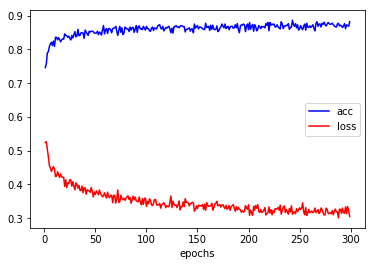

In [1519]:
# print(model.metrics_names)
plt.plot(hist.history['acc'], 'b-', label='acc' )
plt.plot(hist.history['loss'], 'r-', label='loss' )
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
result = pred.argmax(axis=1)

## Submission file:

In [1523]:
submission = pd.DataFrame({'PassengerId': test.index, 'Survived': result})
submission.to_csv('titanic/submission.csv', index=False)